# 1 - Importing Dependecies 

In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import pandas as pd
import numpy as np 
import random
import cv2
import os




import time

# 1.1 - Data Pipeline 

In [2]:
os.listdir()

## Data Directory Path
print('#1 - Initialzing DataFrame...\n')
imageID_Path = os.listdir('data/Modern_Contemporary')

## Creating data frame based on directory contents 
imagePath_df = pd.DataFrame({'ID':[n.split('.')[0] for n in imageID_Path],
                                'Path':['data/Modern_Contemporary/' + n for n in imageID_Path]})

## Extracting features of images from the CSV file
csv_dataPath = os.path.join('data/Modern_Contemporary','data.csv')
imageFeatures_df = pd.read_csv(csv_dataPath, sep=',')

## COnvoerting all values to integer values
imagePath_df["ID"]= pd.to_numeric(imagePath_df["ID"],errors='coerce')



## Error handling for none JPEG Images

for i,row in imagePath_df.iterrows():
    picture_Path = row['Path']
    # print(picture_Path)
    extCheck = len(picture_Path)
    path = picture_Path[extCheck-4:]
    if (path != 'JPEG'):
        imagePath_df.drop(i, inplace=True)


print( "Numbers of Images succefully imported:",len(imagePath_df))




#1 - Initialzing DataFrame...

Numbers of Images succefully imported: 2493


In [3]:
merged_df = pd.merge(left=imagePath_df, right=imageFeatures_df, on='ID', how='inner', )

print('Merging Dataframes...')

Merging Dataframes...


# 2 - Cleaning Data

In [4]:
## Validating the data
print('Cleaning Data...')

for i, row in merged_df.iterrows():
    if(merged_df.loc[i, 'Hammer Price'] == 'Not Sold'): 
        merged_df.loc[i, 'Hammer Price'] = 0.0
merged_df['Hammer Price'] = pd.to_numeric(merged_df['Hammer Price'], errors='coerce')

merged_df['Low Estimation Price'] = merged_df['Low Estimation Price'].replace(np.nan, 0)


Cleaning Data...


# 3 - Loading Images to dataframe

In [5]:
# ##Creating List for Compressed Numpy array data paths

images = []
id = []
IMAGE_RESIZE = (256,256)


for i, row in merged_df.iterrows():

    ## ASsigning iamge path the picture path
    picture_Path = row['Path']
    iD = row = row["ID"]

    # Reading Image Path, Color Correcting, and then resizing
    pic_bgr_arr = cv2.imread(picture_Path)
    pic_rgb_arr = cv2.cvtColor(pic_bgr_arr, cv2.COLOR_BGR2RGB)
    pic_rgb_arr = cv2.resize(pic_rgb_arr, IMAGE_RESIZE)
    # pic_rgb_arr = pic_rgb_arr / 255.0

    # Append to Image List
    images.append(pic_rgb_arr)
    id.append(iD)

# ZIP contents to load into datafram
dfData = list(zip(id, images))
images_df = pd.DataFrame(dfData, columns=['ID', 'Image'])


In [6]:
len(images)

2493

In [7]:
# // merging with dataframe
merged_df = pd.merge(left=merged_df, right=images_df, on='ID', how='inner')



In [8]:
merged_df.drop(['Low Estimation Price', 'High Estimation Price', 'Hammer Price', 'Size', 'Path', 'ID', 'Artist' ],inplace=True, axis=1)

In [9]:
merged_df.head()

,Medium,Image
0,Oil on canvas,"[[[0.5686274509803921, 0.8235294117647058, 0.8..."
1,Silkscreen in colours,"[[[0.34901960784313724, 0.396078431372549, 0.4..."
2,Oil on panel,"[[[0.10588235294117647, 0.13725490196078433, 0..."
3,Acrylic on canvas,"[[[0.5411764705882353, 0.7254901960784313, 0.6..."
4,Oil on plate,"[[[0.03137254901960784, 0.0392156862745098, 0...."


# 4 - One hot encoding

In [24]:


from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(merged_df[['Medium']]).toarray(), columns=encoder.categories_)
len(encoder_df)

labels = encoder.categories_
#merge one-hot encoded columns back with original DataFrame

#view final df
# print(en_df)
# features_df.tail()


In [28]:
labels = np.array(labels).ravel()

475

In [11]:
encoder_Arr = encoder_df.to_numpy()
encoderLen = len(encoder_Arr)
encoderSeries = []


In [12]:
for i in range(encoderLen): 
    encoderSeries.append(encoder_Arr[i])
    # print(np.array_str(encoder_Arr[i], max_line_width=np.inf))



In [13]:
merged_df['OneHot'] = pd.Series(encoderSeries)

In [14]:

shuffled_df = merged_df.sample(frac=1)



train_df, val_df, test_df = shuffled_df[:1440], shuffled_df[1440:2160], shuffled_df[2160:]

len(train_df), len(val_df), len(test_df)


(1440, 720, 333)

In [15]:
train_df.head()

,Medium,Image,OneHot
1395,Oil on velvet,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1702,Serigraph in colours,"[[[0.9254901960784314, 0.9137254901960784, 0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
773,on canvas,"[[[0.6392156862745098, 0.615686274509804, 0.51...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2217,Serigraph goauche,"[[[0.9450980392156862, 0.9058823529411765, 0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1756,Watercolor and bodycolour,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:


def get_X_y(df):

    dfArr = np.array(df)

    x_pic = []
    y_medium = []

    for i in range(len(df)): 

        pic = dfArr[i, 1]
        x_pic.append(pic)


        medium = dfArr[i, 2]
        y_medium.append(medium)

    X_pic = np.asarray(x_pic)
    Y_medium = np.asarray(y_medium)


    return X_pic, Y_medium  



In [17]:
X_train_pic, Y_train_med = get_X_y(train_df)

X_val_pic,  Y_val_med = get_X_y(val_df)

X_test_pic, Y_test_med = get_X_y(test_df)

In [34]:
# Y_train_art[0]
X_train_picTensor = tf.convert_to_tensor(X_train_pic, dtype="float64")
Y_trainMedTensor = tf.convert_to_tensor(Y_train_med, dtype="int32")

X_val_picTensor = tf.convert_to_tensor(X_val_pic, dtype="float64")
Y_valMedTensor = tf.convert_to_tensor(Y_val_med, dtype="int32")



# 5 - Modeling

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
import tensorflow as tf

In [31]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# MaxPool condesing wach 2x2 patch and taking max value
model.add(Dropout(0.2))

model.add(Conv2D(128,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(64,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(32,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(16,  (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(len(labels), activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 62, 62, 128)      

In [35]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(x = X_train_picTensor, y = Y_trainMedTensor, epochs=3, validation_data=[X_val_picTensor, Y_valMedTensor], callbacks=[tensorboard_callback])

Epoch 1/3
45/45 [==============================] - 121s 3s/step - loss: 3.7659 - accuracy: 0.3528 - val_loss: 4.6413 - val_accuracy: 0.3444
Epoch 2/3
45/45 [==============================] - 159s 3s/step - loss: 3.6510 - accuracy: 0.3528 - val_loss: 4.5884 - val_accuracy: 0.3444
Epoch 3/3
45/45 [==============================] - 133s 3s/step - loss: 3.6273 - accuracy: 0.3528 - val_loss: 4.6513 - val_accuracy: 0.3444


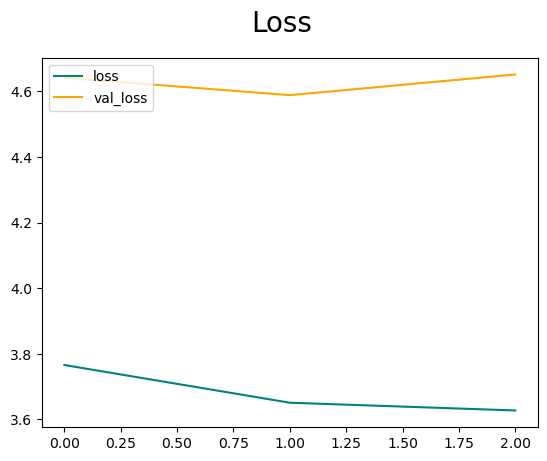

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

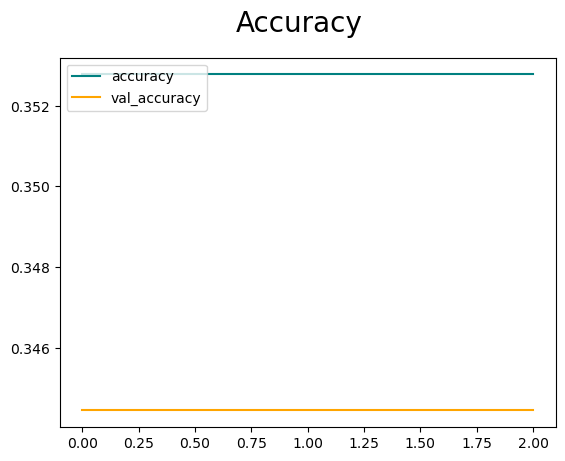

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()